<div style="text-align:center"><span style="color:red; font-family:Georgia; font-size:4.5em;">House Price Prediction </span></div>
<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2.5em;">in </span></div>
<div style="text-align:center"><span style="color:red; font-family:Georgia; font-size:2.5em;">King County, Seattle, USA </span></div>

In this project, I will create a model to predict the price of houses in King County, Seattle, USA by using a Regression algorithms.

### Loading Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from IPython.display import Latex
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. This data set contains 21613 observations with 21 features which is great dataset for evaluating simple regression models. The description of the data is as follows:

* **id:** Unique ID for each home sold
* **date:** Date of the home sold
* **price:** Price of each home sold
* **bedrooms:** Number of bedrooms
* **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living:** Square footage of the apartments interior living space
* **sqft_lot:** Square footage of the land space
* **floors:** Number of floors
* **waterfront:** A dummy variable for whether the apartment was overlooking the waterfront or not
* **view:** An index from 0 to 4 of how good the view of the property was
* **condition:**  An index from 1 to 5 on the condition of the apartment,
* **grade:** An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above:** The square footage of the interior housing space that is above ground level
* **sqft_basement:** The square footage of the interior housing space that is below ground level
* **yr_built:** The year the house was initially built
* **yr_renovated:** The year of the house’s last renovation
* **zipcode:** What zipcode area the house is in
* **lat:** Lattitude
* **long:** Longitude
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors

### Loading House Sale Data 

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <font color='blue'> Data Wrangling </font>

In [3]:
df.shape

(21613, 21)

### Checking for data types

In [4]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#Changing the data types of date
df[["date"]] = df[["date"]].astype("datetime64")
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Checking for Duplicate values

In [6]:
duplicate = df[df.duplicated()]  
print("Duplicate Rows :")  
duplicate 

Duplicate Rows :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There are no duplicate rows.

### Checking for missing data

In [7]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

### Dealing with missing data

##### bedrooms:
 - There are 13 missing values in the column bedrooms. We can replace these values by highly repeated number of bedrooms.
 
##### bathrooms:
- There are 10 missing values in the column bathrooms. We can replace these values by highly repeated number of bathrooms.

In [8]:
# Countinig bedrooms categories
df['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9824
4.0,6882
2.0,2760
5.0,1601
6.0,272
1.0,199
7.0,38
8.0,13
9.0,6
10.0,3


In [9]:
# Countinig bedrooms categories
df['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5380
1.00,3852
1.75,3048
2.25,2047
2.00,1930
1.50,1446
2.75,1185
3.00,753
3.50,731
3.25,589


The mostly repeated bedroom is 3 and the mostly repeated bathroom is 2.5. So we are going to replace all the missing values of the column 'bedrooms' by 3 and all the missing values of the column 'bathrooms' by 2.5.

In [10]:
# Replacing missing values in bedrooms by 3
df['bedrooms'].replace(np.nan, 3, inplace = True)

In [11]:
# Replacing missing values in bathrooms by 2.5
df['bathrooms'].replace(np.nan, 2.5, inplace = True)

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

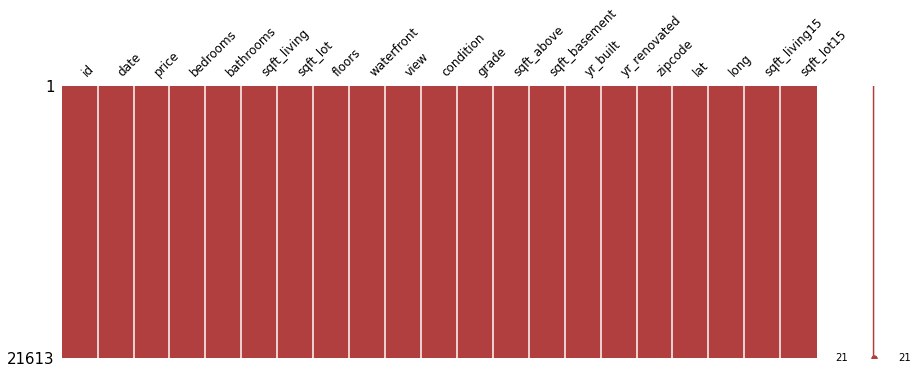

In [13]:
#Graphically
msno.matrix(df, figsize=(15,5), fontsize=12, color=(0.7, 0.25, 0.25));

Good news. There are no more missing values in the dataset.

### Removing Unnecessary features

"id" feature has basically an unique values for each transaction to identify it. Therefore, it can be eliminated from the dataset as not informative.

In [14]:
df.drop('id', axis=1, inplace=True)

In [15]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <font color = 'blue'> Exploratory Data Analysis <font>

### Target Variable:

We are going to predict the Price of a house, So 'price' is the target or dependent variable.

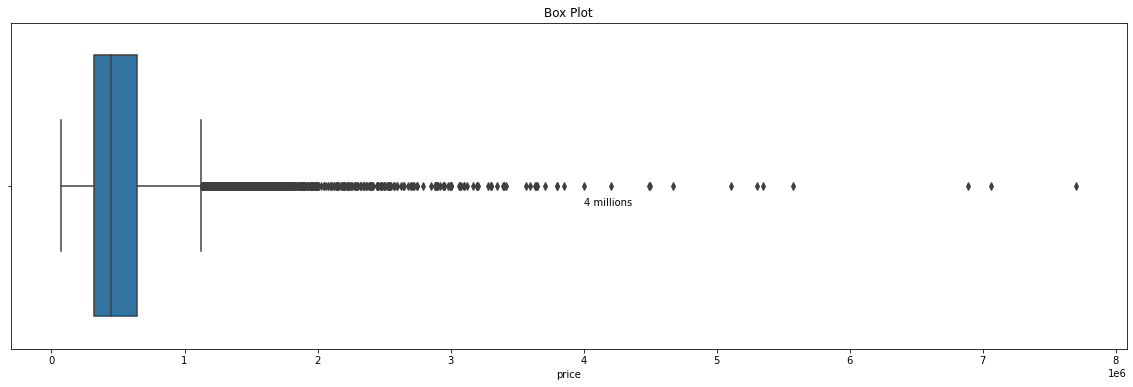

In [16]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
ax.set(title='Box Plot')
sns.boxplot(x = df['price'])
ax.annotate(str('4 millions'),(4000000,0.06))
plt.show()

There are houses having price more than 4 millions.

### Categorical Features

In [17]:
# Countinig floors
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


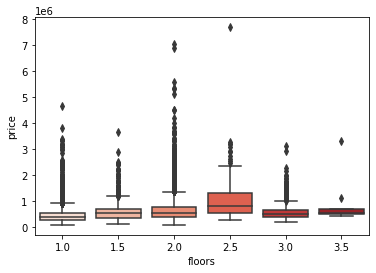

In [18]:
sns.boxplot(x="floors", y="price", data=df, palette='Reds')
plt.show()

Price increases as floors increases to 2.5

In [19]:
# Countinig waterfront
df['waterfront'].value_counts().to_frame()

,waterfront
0,21450
1,163


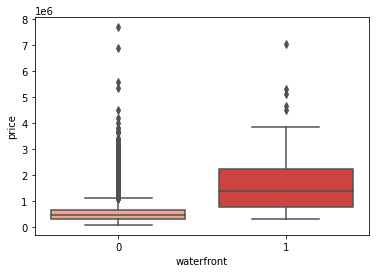

In [20]:
sns.boxplot(x="waterfront", y="price", data=df,palette='Reds')
plt.show()

Houses with waterfront 1 have more price.

In [21]:
# Countinig bedrooms
df['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9837
4.0,6882
2.0,2760
5.0,1601
6.0,272
1.0,199
7.0,38
8.0,13
9.0,6
10.0,3


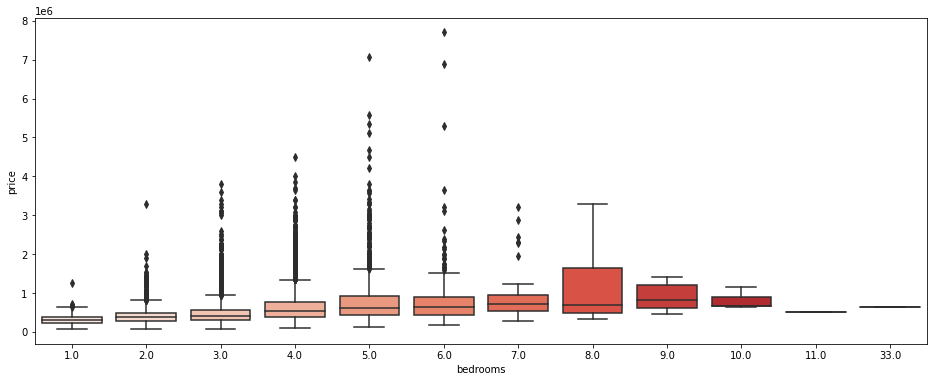

In [22]:
plt.subplots(1,1,figsize=(16,6))
sns.boxplot(x="bedrooms", y="price", data=df,palette='Reds')
plt.show()

The price seems to increase as the number of bedrooms increase up to 8.

In [23]:
# Countinig view
df['view'].value_counts().to_frame()

,view
0,19489
2,963
3,510
1,332
4,319


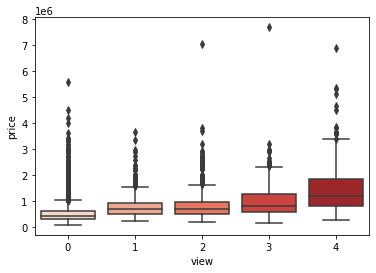

In [24]:
sns.boxplot(x="view", y="price", data=df, palette='Reds')
plt.show()

The price seems to increase as views increase.

In [25]:
# Countinig grade
df['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5390
1.00,3852
1.75,3048
2.25,2047
2.00,1930
1.50,1446
2.75,1185
3.00,753
3.50,731
3.25,589


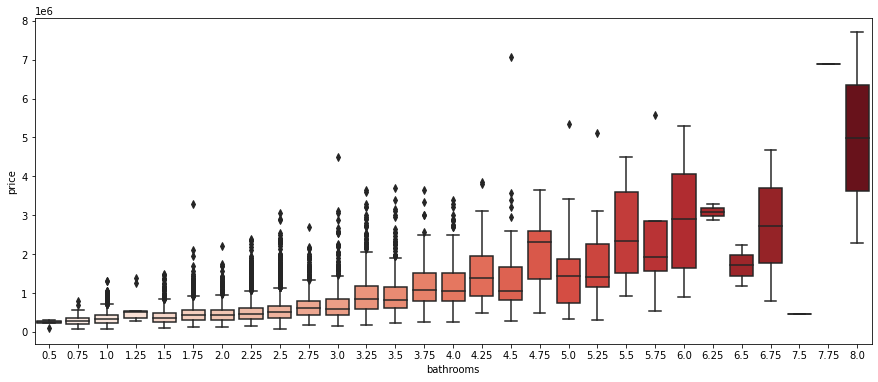

In [26]:
plt.subplots(figsize=(15,6))
sns.boxplot(x="bathrooms", y="price", data=df, palette='Reds');

House price increases as number of bathroom increases.

In [27]:
# Countinig grade
df['grade'].value_counts().to_frame()

,grade
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29
13,13


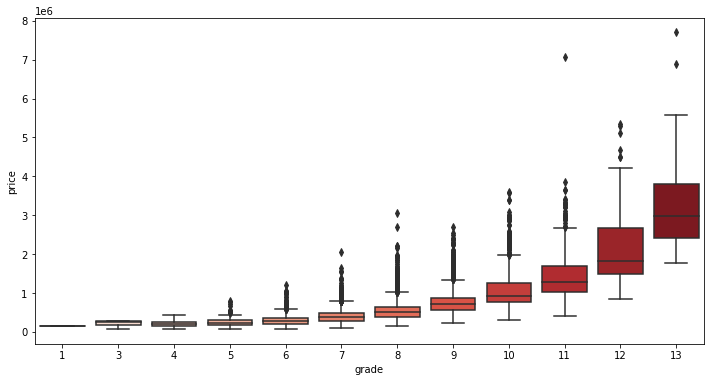

In [28]:
plt.subplots(1,1,figsize=(12,6))
sns.boxplot(x="grade", y="price", data=df, palette='Reds');

The price seems to increase as the grade increases.

### Numeric features

#### Summary statistics of the data

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.372646,0.926423,1.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.115914,0.768862,0.5000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


### Distributions Of Feature Values

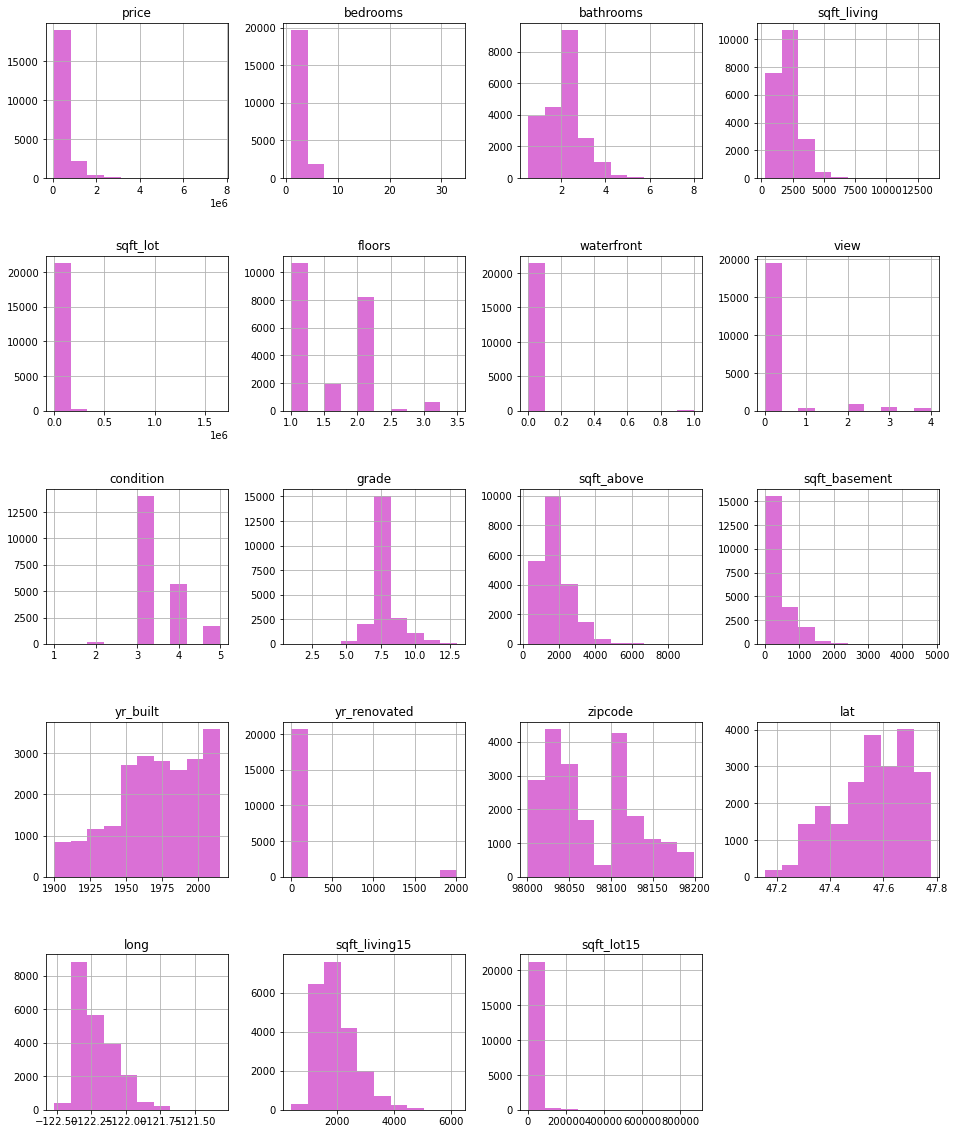

In [30]:
#Calling `hist` method to plot histograms of each of the numeric features for data bank
df.hist(figsize=(16,20), color = 'orchid')
plt.subplots_adjust(hspace=0.5)
plt.show()

This shows that some of the features have not good distribution

#### Lattitude and Longitude

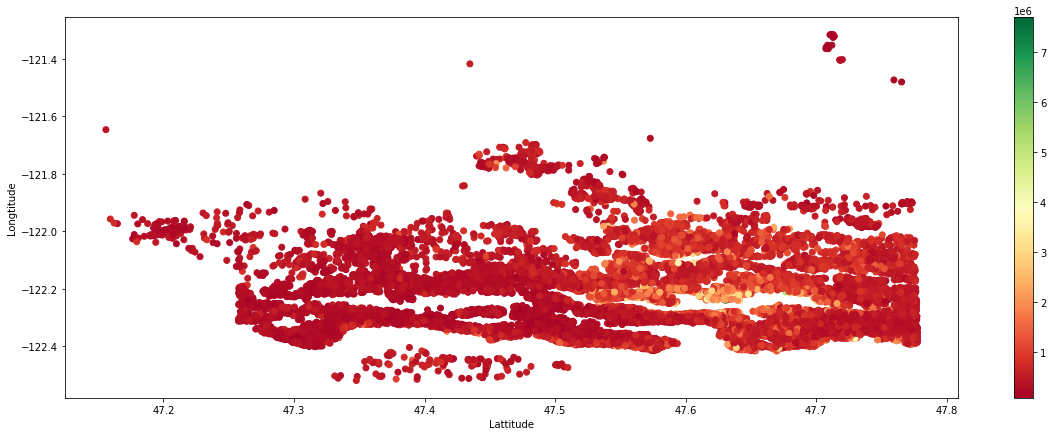

In [31]:
fig,ax=plt.subplots(figsize=(20,7))
plt.scatter(df['lat'],df['long'],c=df['price'],cmap='RdYlGn')
plt.xlabel('Lattitude')
plt.ylabel('Longtitude')
plt.colorbar()
plt.show()

The houses between Lat: 47.5 and 47.75, Long: -122.4 and -121.8 are more expensive than others as given in the Price Colour bar.

#### Zipcodes

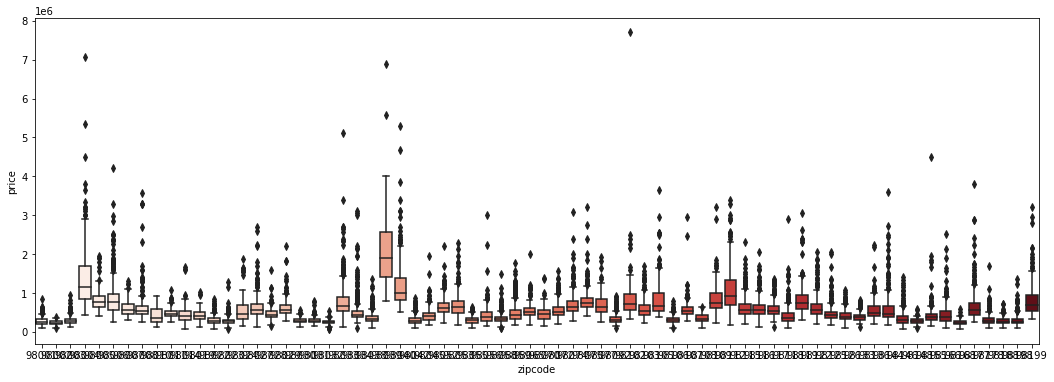

In [32]:
fig,ax = plt.subplots(figsize=(18,6))
sns.boxplot(x='zipcode',y='price',data=df, palette='Reds');

Some of the Zipcodes have higher house price.

#### Pair Plot of Numeric fratures

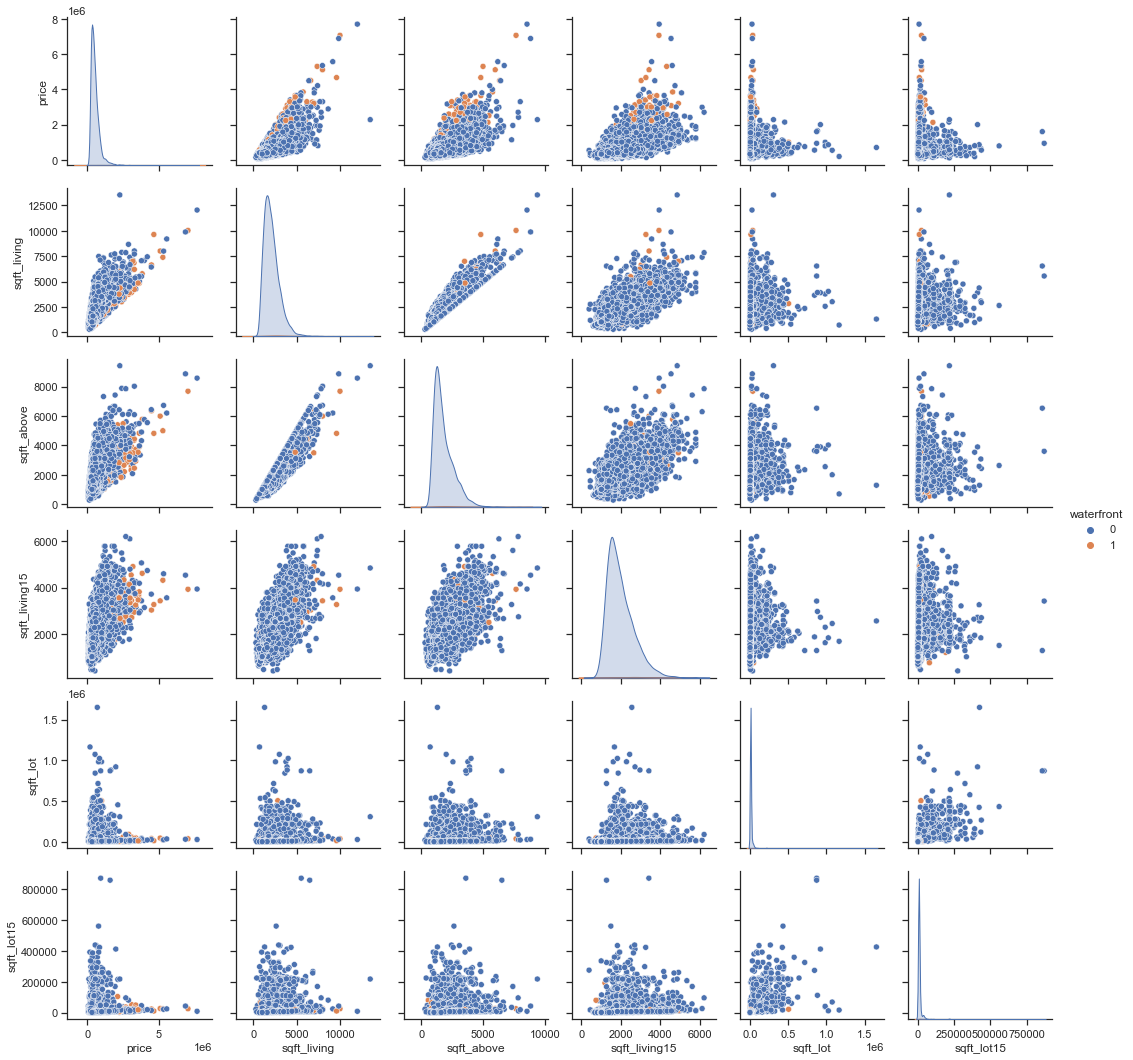

In [33]:
df1 = df[['price','sqft_living','sqft_above', 'sqft_living15', 'sqft_lot', 
          'sqft_lot15','waterfront']]

sns.set(style="ticks", color_codes=True)
sns.pairplot(df1, hue = 'waterfront')
plt.show()

### Correlation matrix and Heatmap

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.

In [34]:
# get correlation matrix
corr = df.corr()

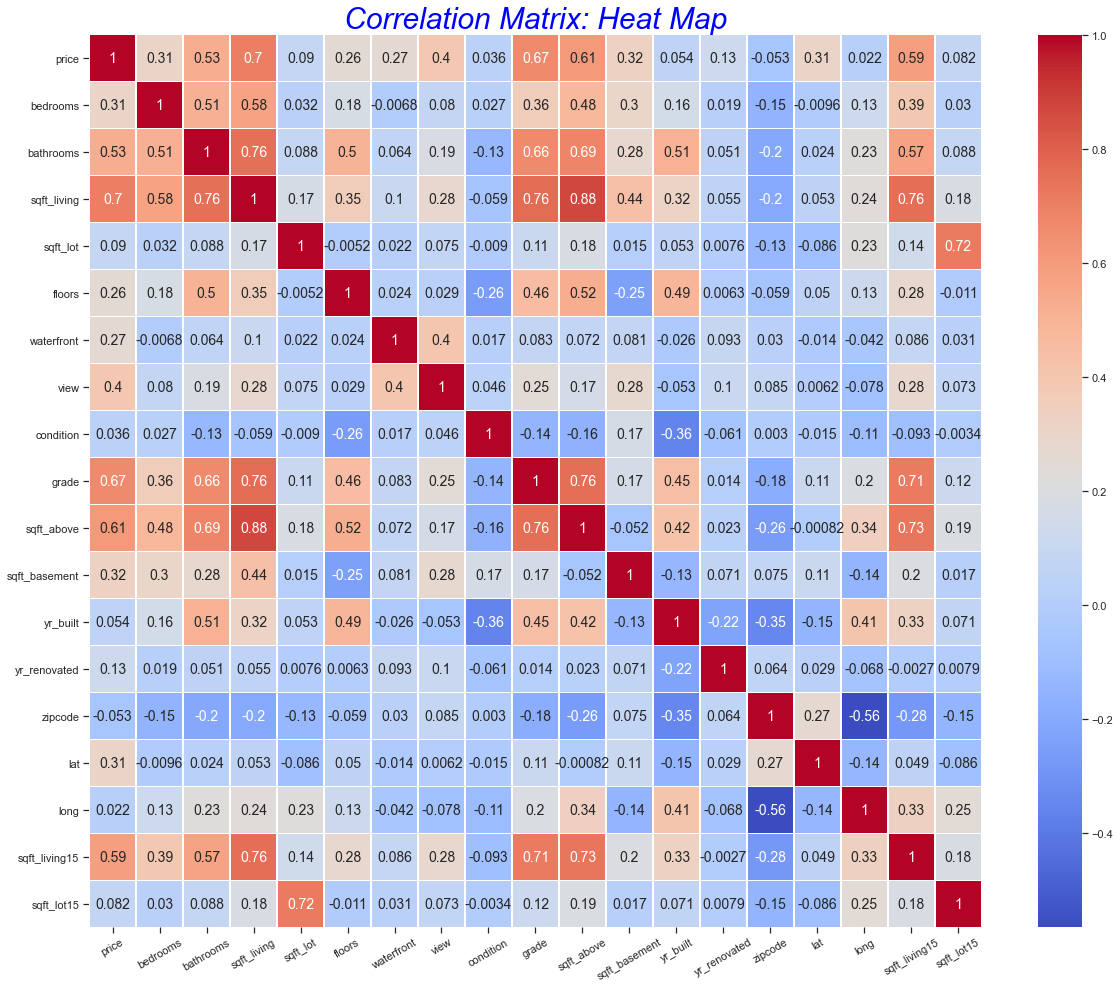

In [35]:
# Heat map using seaborn

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5,vmax= 1 ,square=True, annot = True, 
            linecolor='w', annot_kws={"size":14}, cbar_kws={"shrink": 0.82})
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Correlation Matrix: Heat Map', fontsize = 30, color='Blue', fontstyle='italic')
plt.show()


### Sorting the correlation of features with price

In [36]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525649
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

### Binning: Construnction year and Renovation year
Data binning is a preprocessing technique used for data smoothing to make the data proper and qualitative for statistical analysis. It is worthwhile applying this transformation to some columns of dataset. Here, Binning is applied to yr_built and yr_renovated. Ages and renovation ages of the houses are calculated in relation to the date the propriety is sold. 

In [37]:
# just take the year and month from the date column and create new columns
df['sold_yr']= pd.DatetimeIndex(df['date']).year
df['sold_mth']= pd.DatetimeIndex(df['date']).month

# add the age of the building as a new column 
df['age']= df['sold_yr']- df['yr_built']

# add the age of the renovation as a new column 

# initialize age of the renovation to zero
df['age_renov']=0

# age renov = sold year with nonzero renovated yr - reno yr 
df['age_renov']= df['sold_yr'][df['yr_renovated']!=0].astype(int)-\
                 df['yr_renovated'][df['yr_renovated']!=0]

# age renov = age of the building if the building is not renovated
df['age_renov'][df['age_renov'].isnull()]= df['age']

In [38]:
# partition the age into bins
bins_age = [-2,1,5,10,20,30,60,100,100000]
labels = [0,5,10,20,30,60,80,100]
df['age_binned'] = pd.cut(df['age'], bins=bins_age, labels=labels)
pd.value_counts(df['age_binned'])

60     7209
80     4947
20     2518
30     2471
10     2067
100    1012
0       727
5       662
Name: age_binned, dtype: int64

In [39]:
# partition the age_rnv into bins
bins_ren = [-2,1,5,10,20,30,50,100000]
labels = [0,5,10,20,30,60,100]
df['age_renov_binned'] = pd.cut(df['age_renov'], bins=bins_ren, labels=labels)
pd.value_counts(df['age_renov_binned'])

100    7769
60     4679
20     2726
30     2644
10     2205
0       864
5       726
Name: age_renov_binned, dtype: int64

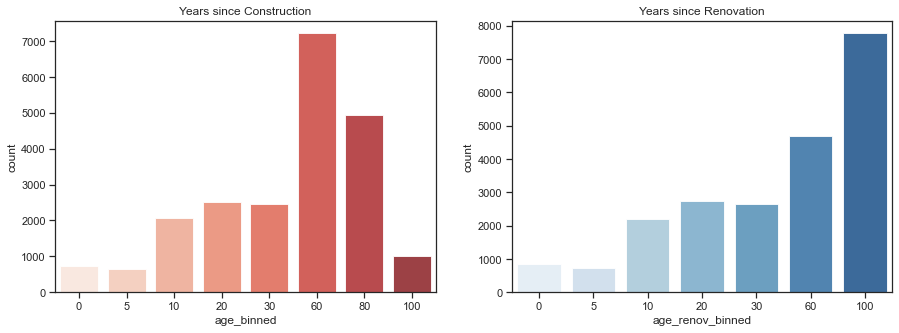

In [40]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(df['age_binned'], palette='Reds', ax=ax[0], alpha=0.85);
sns.countplot(df['age_renov_binned'], palette='Blues', ax=ax[1], alpha=0.85)
ax[0].set_title('Years since Construction')
ax[1].set_title('Years since Renovation');

### Year and Month of Transaction 

The transactions range from May-2014 to May-2015. There is about a fluctuation of 10% between the min and max at monthly levels. The date is split in two different features: Year and Month of the transaction, while the original feature is dropped.

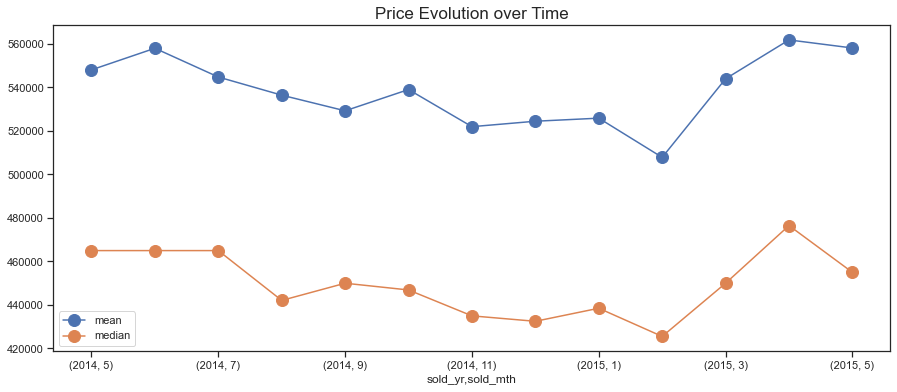

In [41]:
df.groupby(["sold_yr","sold_mth"])["price"].agg(['mean',
                                                   'median']).plot(figsize=(15,6), 
                                                                   marker='o', 
                                                                   markersize = 12)
plt.title('Price Evolution over Time', fontsize=17);

### Features to Normalize

Some Features distribution go through a log transformation, to make their distribution more Normal-like. The original features are then dropped.

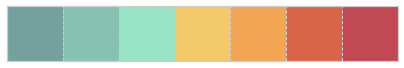

In [42]:
# Set theme
sns.set_theme()
sns.set_style("whitegrid",{"grid.linestyle":"--"})

# Set Color Palettes for the notebook
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.palplot(sns.color_palette(custom_colors))

#### Price:

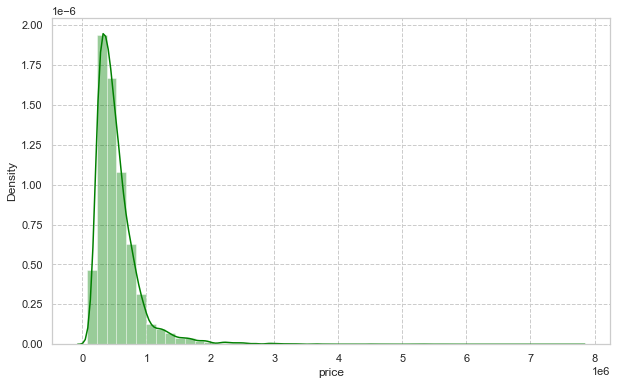

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df["price"], bins = 50, color='green', kde = True)
plt.show()

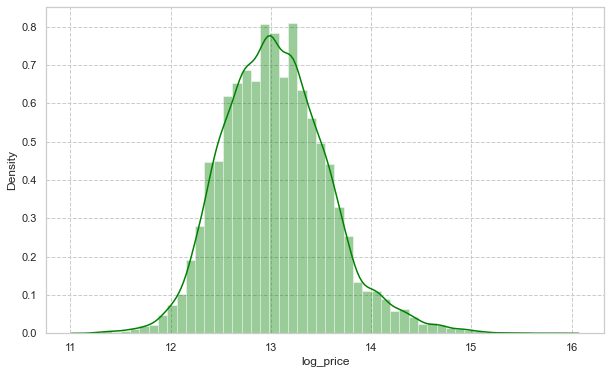

In [44]:
df["log_price"] = np.log(df["price"])
plt.figure(figsize=(10,6))
sns.distplot(df["log_price"], color='green');

#### Dropping the original feature of 'price'

In [45]:
df.drop(['price'], inplace=True, axis=1)

### Other Features to Normalize:

The same procedure is applied to these features:

- sqft_living
- sqft_lot
- sqft_basement 
- sqft_living15 
- sqft_lot15

Since the value "0" cannot go through a log transformation, a +1 is added to those features that can assume that value:

In [46]:
cols = ["sqft_living","sqft_lot","sqft_basement","sqft_living15","sqft_lot15"]
df[cols].describe()

,sqft_living,sqft_lot,sqft_basement,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,2079.899736,1.510697e+04,291.509045,1986.552492,12768.455652
std,918.440897,4.142051e+04,442.575043,685.391304,27304.179631
min,290.000000,5.200000e+02,0.000000,399.000000,651.000000
25%,1427.000000,5.040000e+03,0.000000,1490.000000,5100.000000
50%,1910.000000,7.618000e+03,0.000000,1840.000000,7620.000000
75%,2550.000000,1.068800e+04,560.000000,2360.000000,10083.000000
max,13540.000000,1.651359e+06,4820.000000,6210.000000,871200.000000


Basement squared feet size is the only features showing 0 in this subset of features.

In [47]:
df.loc[:,'sqft_basement_log'] = np.log(df.loc[:,'sqft_basement']+1)
df.loc[:,'sqft_living_log'] = np.log(df.loc[:,'sqft_living'])
df.loc[:,'sqft_lot_log'] = np.log(df.loc[:,'sqft_lot'])
df.loc[:,'sqft_living15_log'] = np.log(df.loc[:,'sqft_living15'])
df.loc[:,'sqft_lot15_log'] = np.log(df.loc[:,'sqft_lot15'])

The original and the new distribution of these features is shown in the graphs below:

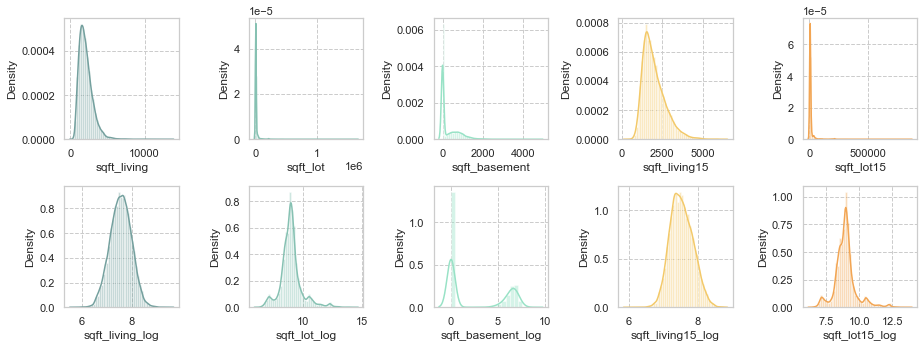

In [48]:
log_cols = ["sqft_living_log","sqft_lot_log","sqft_basement_log",
            "sqft_living15_log","sqft_lot15_log"]

fig, axes = plt.subplots(2,5,figsize=(13,5))
axes = np.ravel(axes)
for num, ax in enumerate(axes):
  if num<5:
    sns.distplot(df[cols[num]],ax=ax, color=custom_colors[num])
  else:
    sns.distplot(df[log_cols[num-5]],ax=ax, color=custom_colors[num-5])
    
plt.tight_layout()

#### Dropping the original features as before:

In [49]:
df.drop(cols, axis=1, inplace=True)

In [50]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,yr_built,...,age,age_renov,age_binned,age_renov_binned,log_price,sqft_basement_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log
0,2014-10-13,3.0,1.00,1.0,0,0,3,7,1180,1955,...,59,59.0,60,100,12.309982,0.000000,7.073270,8.639411,7.200425,8.639411
1,2014-12-09,3.0,2.25,2.0,0,0,3,7,2170,1951,...,63,23.0,80,30,13.195614,5.993961,7.851661,8.887653,7.432484,8.941022
2,2015-02-25,2.0,1.00,1.0,0,0,3,6,770,1933,...,82,82.0,80,100,12.100712,0.000000,6.646391,9.210340,7.908387,8.994917
3,2014-12-09,4.0,3.00,1.0,0,0,5,7,1050,1965,...,49,49.0,60,60,13.311329,6.814543,7.580700,8.517193,7.215240,8.517193
4,2015-02-18,3.0,2.00,1.0,0,0,3,8,1680,1987,...,28,28.0,30,30,13.142166,0.000000,7.426549,8.997147,7.495542,8.923058


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21613 non-null  datetime64[ns]
 1   bedrooms           21613 non-null  float64       
 2   bathrooms          21613 non-null  float64       
 3   floors             21613 non-null  float64       
 4   waterfront         21613 non-null  int64         
 5   view               21613 non-null  int64         
 6   condition          21613 non-null  int64         
 7   grade              21613 non-null  int64         
 8   sqft_above         21613 non-null  int64         
 9   yr_built           21613 non-null  int64         
 10  yr_renovated       21613 non-null  int64         
 11  zipcode            21613 non-null  int64         
 12  lat                21613 non-null  float64       
 13  long               21613 non-null  float64       
 14  sold_y

In [52]:
df.drop(['date','yr_built','yr_renovated'], inplace=True, axis=1)

In [53]:
df['age_binned'] = df['age_binned'].astype('int64') 
df['age_renov_binned'] = df['age_renov_binned'].astype('int64') 

### Feature Selection

In [54]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,...,age,age_renov,age_binned,age_renov_binned,log_price,sqft_basement_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log
0,3.0,1.00,1.0,0,0,3,7,1180,98178,47.5112,...,59,59.0,60,100,12.309982,0.000000,7.073270,8.639411,7.200425,8.639411
1,3.0,2.25,2.0,0,0,3,7,2170,98125,47.7210,...,63,23.0,80,30,13.195614,5.993961,7.851661,8.887653,7.432484,8.941022
2,2.0,1.00,1.0,0,0,3,6,770,98028,47.7379,...,82,82.0,80,100,12.100712,0.000000,6.646391,9.210340,7.908387,8.994917
3,4.0,3.00,1.0,0,0,5,7,1050,98136,47.5208,...,49,49.0,60,60,13.311329,6.814543,7.580700,8.517193,7.215240,8.517193
4,3.0,2.00,1.0,0,0,3,8,1680,98074,47.6168,...,28,28.0,30,30,13.142166,0.000000,7.426549,8.997147,7.495542,8.923058


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21613 non-null  float64
 1   bathrooms          21613 non-null  float64
 2   floors             21613 non-null  float64
 3   waterfront         21613 non-null  int64  
 4   view               21613 non-null  int64  
 5   condition          21613 non-null  int64  
 6   grade              21613 non-null  int64  
 7   sqft_above         21613 non-null  int64  
 8   zipcode            21613 non-null  int64  
 9   lat                21613 non-null  float64
 10  long               21613 non-null  float64
 11  sold_yr            21613 non-null  int64  
 12  sold_mth           21613 non-null  int64  
 13  age                21613 non-null  int64  
 14  age_renov          21613 non-null  float64
 15  age_binned         21613 non-null  int64  
 16  age_renov_binned   216

In [56]:
df.corr()['log_price'].sort_values(ascending = False)

log_price            1.000000
grade                0.703634
sqft_living_log      0.674913
sqft_living15_log    0.607187
sqft_above           0.601801
bathrooms            0.550611
lat                  0.449174
view                 0.346522
bedrooms             0.343563
floors               0.310558
sqft_basement_log    0.236386
waterfront           0.174586
sqft_lot_log         0.137727
sqft_lot15_log       0.122995
long                 0.049942
condition            0.039558
sold_yr              0.004679
sold_mth            -0.013149
zipcode             -0.038306
age                 -0.080574
age_binned          -0.125777
age_renov           -0.130190
age_renov_binned    -0.190815
Name: log_price, dtype: float64

From the above, we see that the highly related variables with log_price are: grade,sqft_living_log,sqft_living15_log,sqft_above, bathrooms, lat,view, bedroom, floors, sqft_basement_log, waterfront, sqft_lot_log, sqft_lot15_log, age_binned, age_renov, age_renov_binned. So our study will mostly focus with these variables.

### Model Development


In [57]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
features =[ 'grade', 'sqft_living_log', 'sqft_living15_log', 'sqft_above', 'bathrooms', 
           'lat', 'view', 'bedrooms', 'floors', 'sqft_basement_log', 'waterfront', 
           'sqft_lot_log', 'sqft_lot15_log', 'age_binned', 'age_renov', 'age_renov_binned']
X = df[features] # input data
y = df['log_price'] #output data

### Train-Test dataset:

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=.25, random_state=11)

print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Train Data Shape: (16209, 16)
Test Data Shape: (5404, 16)


### Linear model (Multiple Linear Regression)

Let us fit a linear regression model to predict the 'price' using the list of following features:

In [60]:
# linear model
linear_model = LinearRegression() 
linear_model.fit(X_train,y_train)

LinearRegression()

In [61]:
# Prediction using model
y_pred = linear_model.predict(X_test)
y_pred[0:5]

array([12.55959847, 13.22452493, 13.30344895, 13.63883381, 13.45810819])

In [62]:
# Model Evaluation R^2
print('The R-square is: ', linear_model.score(X_test, y_test))

The R-square is:  0.7627098205383631


In [63]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, y_pred, squared=False))


The MSE is:  0.25417979398394724


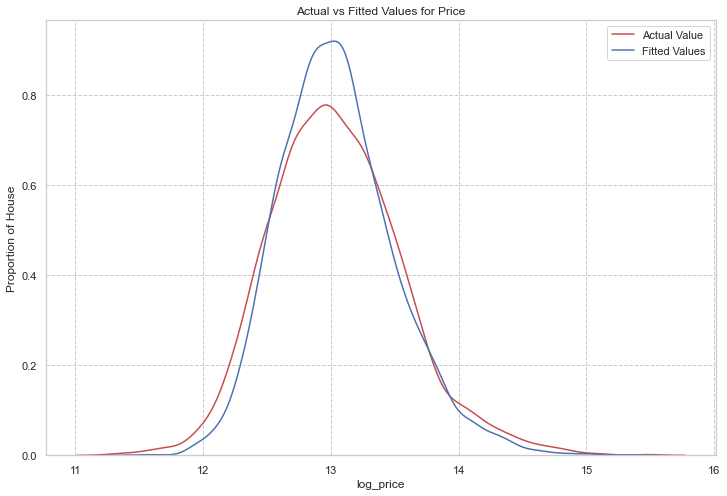

In [64]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(y_pred, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

#### Using Pipeline

In [65]:
#fiting pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model', LinearRegression())]
pipe=Pipeline(Input) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [66]:
# Prediction
ypipe=pipe.predict(X_test) 
ypipe[0:4]

array([12.61532223, 13.15352607, 13.31920171, 13.6028161 ])

In [67]:
# model evalution R^2
print('The R^2 is: ', pipe.score(X_test, y_test))

The R^2 is:  0.8094625196329541


In [68]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, ypipe, squared=False))

The MSE is:  0.2277672875700512


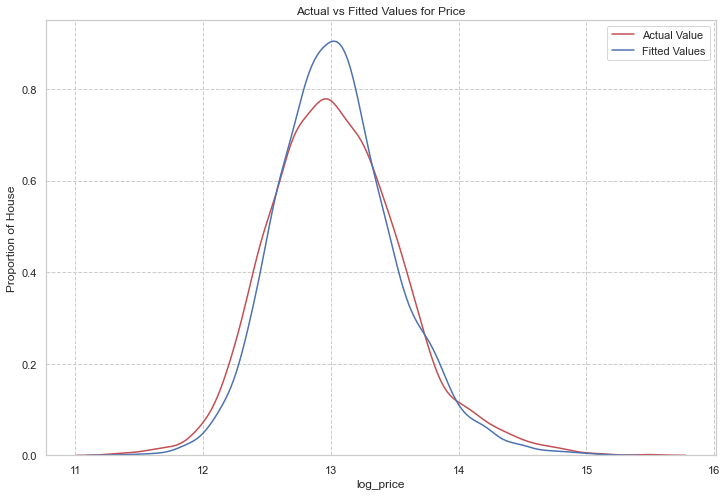

In [69]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypipe, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

#### Ridge Regression

In [70]:
from sklearn.linear_model import Ridge
# fitting ridge model
RidgeModel = Ridge(alpha=0.1) 
RidgeModel.fit(X_train, y_train) 

Ridge(alpha=0.1)

In [71]:
# Prediction
yridge=RidgeModel.predict(X_test) 
yridge[0:4]

array([12.55962213, 13.22458905, 13.30348204, 13.63874969])

In [72]:
# model evalution R^2
print('The R^2 is: ', RidgeModel.score(X_test, y_test))

The R^2 is:  0.7627117570104072


In [73]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yridge, squared=False))

The MSE is:  0.25417875682962726


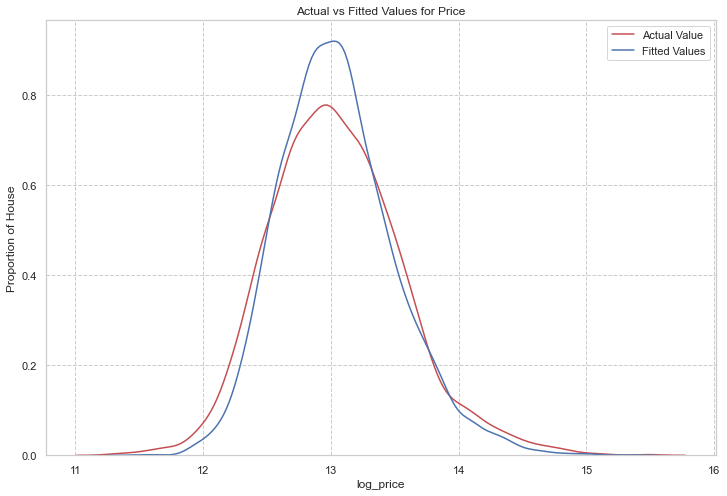

In [74]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yridge, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

#### Polynomial Regression

In [75]:
# fitting a polynomial feature of degree 2
pol2=PolynomialFeatures(degree=2) 
X_train_pol2=pol2.fit_transform(X_train) 
X_test_pol2=pol2.fit_transform(X_test)
RidgeModel2 = Ridge(alpha=0.1) 
RidgeModel2.fit(X_train_pol2, y_train) 

Ridge(alpha=0.1)

In [76]:
# Prediction
ypol2 = RidgeModel2.predict(X_test_pol2)
ypol2[0:4]

array([12.57723555, 13.13725644, 13.24330761, 13.62810673])

In [77]:
# model evalution R^2
print('The R^2 is: ', RidgeModel2.score(X_test_pol2, y_test))

The R^2 is:  0.789286119171426


In [78]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, ypol2, squared=False))

The MSE is:  0.2395232709870792


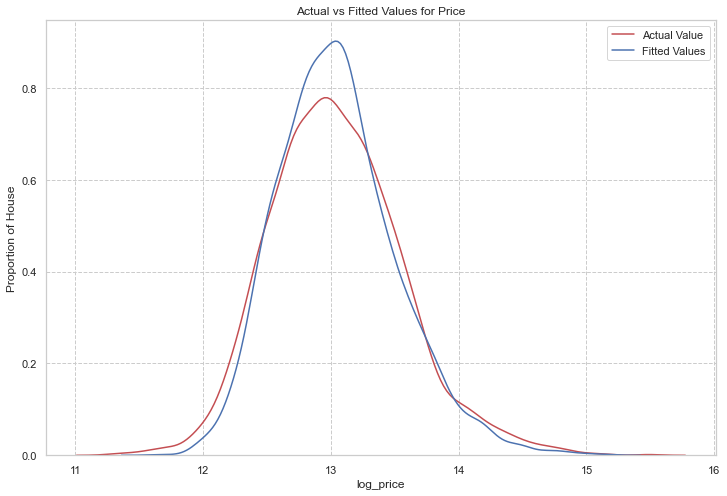

In [79]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypol2, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

In [80]:
# fitting a polynomial feature of degree 3
pol3=PolynomialFeatures(degree=3) 
X_train_pol3=pol3.fit_transform(X_train) 
X_test_pol3=pol3.fit_transform(X_test)
RidgeModel3 = Ridge(alpha=0.1) 
RidgeModel3.fit(X_train_pol3, y_train) 

Ridge(alpha=0.1)

In [81]:
# Prediction
ypol3 = RidgeModel3.predict(X_test_pol3)
ypol3[0:4]

array([12.65577001, 13.12843874, 13.30955807, 13.55622819])

In [82]:
# model evalution R^2
print('The R^2 is: ', RidgeModel3.score(X_test_pol3, y_test))

The R^2 is:  0.7796403267824271


In [83]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, ypol3, squared=False))

The MSE is:  0.24494422283278533


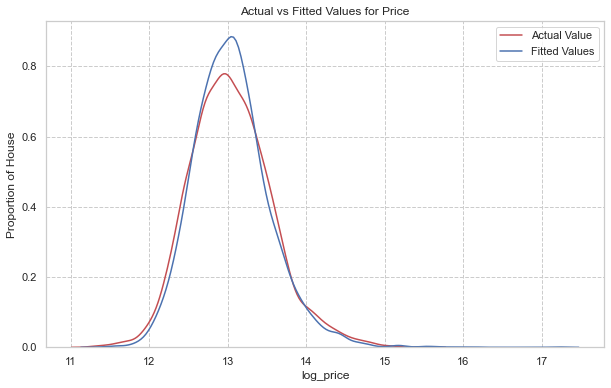

In [84]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypol3, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

### Random Forest Regression

In [85]:
rf_reg = RandomForestRegressor(n_estimators = 1000,
                               n_jobs=-1,
                               random_state = 42, 
                               criterion= 'mse')
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [86]:
# Prediction
yrfreg = rf_reg.predict(X_test)
yrfreg[0:4]

array([12.67033292, 12.93268512, 13.10796002, 13.54490939])

In [87]:
# model evalution R^2
print('The R^2 is: ', rf_reg.score(X_test, y_test))

The R^2 is:  0.8616355480268727


In [88]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yrfreg, squared=False))

The MSE is:  0.19409457844726258


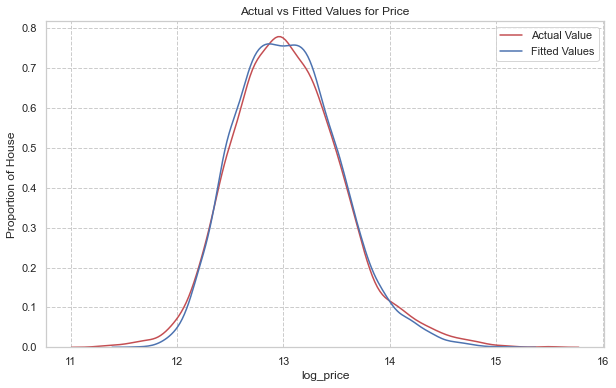

In [89]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yrfreg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

### Extra Trees Regressor

In [90]:
et_reg = ExtraTreesRegressor(n_estimators= 1000,
                               n_jobs=-1,
                               random_state= 42,
                               criterion= 'mse')

et_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [91]:
# Prediction
yetreg = et_reg.predict(X_test)
yetreg[0:4]

array([12.71002125, 12.92159756, 13.20177466, 13.54622711])

In [92]:
# model evalution R^2
print('The R^2 is: ', et_reg.score(X_test, y_test))

The R^2 is:  0.863444117876255


In [93]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yetreg, squared=False))

The MSE is:  0.1928218951411038


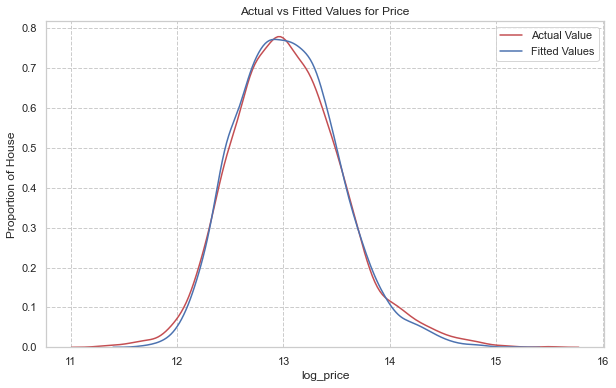

In [94]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot( yetreg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

### XGBRegressor

In [95]:
xgb_reg = XGBRegressor(n_estimators= 1000, 
                       n_jobs=-1,
                       random_state= 42,
                       verbosity=0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [96]:
# Prediction
yxgbreg = xgb_reg.predict(X_test)
yxgbreg[0:4]

array([12.744293, 12.989603, 13.323066, 13.463135], dtype=float32)

In [97]:
# model evalution R^2
print('The R^2 is: ', xgb_reg.score(X_test, y_test))

The R^2 is:  0.8488801332048477


In [98]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yxgbreg, squared=False))

The MSE is:  0.20284388601254263


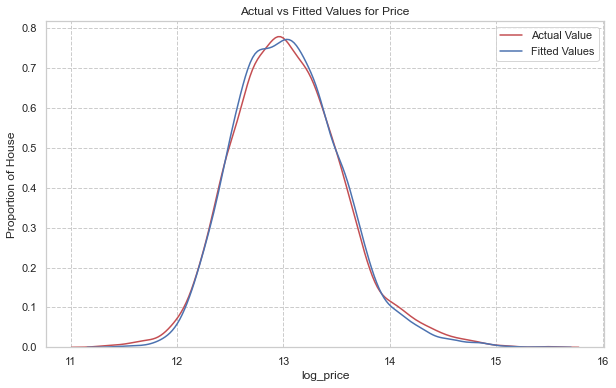

In [99]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yxgbreg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of House')
plt.legend()
plt.show() 
plt.close()

### R-Squared

In [100]:
# Linear Regression
LR_R2 = round(linear_model.score(X_test, y_test), 2)
# Pipeline with linear Regression
PL_R2 = round(pipe.score(X_test, y_test), 2)
# Ridge Regression
RR_R2 = round(RidgeModel.score(X_test, y_test), 2)
# Polynomial Regression with degree 2
PR2_R2 = round(RidgeModel2.score(X_test_pol2, y_test), 2)
# Polynomial Regression with degree 3
PR3_R2 = round(RidgeModel3.score(X_test_pol3, y_test), 2)
# Random Forest Regressor
RFR_R2 = round(rf_reg.score(X_test, y_test), 2)
#Extra Trees Regressor
ETR_R2 = round(et_reg.score(X_test, y_test), 2)
# XGBRegressor
XGB_R2 = round(xgb_reg.score(X_test, y_test), 2)

R2_list = [LR_R2, PL_R2, RR_R2, PR2_R2, PR3_R2, RFR_R2, ETR_R2, XGB_R2]
R2_list

[0.76, 0.81, 0.76, 0.79, 0.78, 0.86, 0.86, 0.85]

### MSE

In [101]:
# Multiple Linear Regression
LR_MSE = round(mean_squared_error(y_test, y_pred, squared=False),2)
# Pipeline with linear Regression
PL_MSE = round(mean_squared_error(y_test, ypipe, squared=False), 2)
# Ridge Regression
RR_MSE = round(mean_squared_error(y_test, yridge, squared=False), 2)
# Polynomial Regression with degree 2
PR2_MSE = round(mean_squared_error(y_test, ypol2, squared=False), 2)
# Polynomial Regression with degree 3
PR3_MSE = round(mean_squared_error(y_test, ypol3, squared=False), 2)
# Random Forest Regressor
RFR_MSE = round(mean_squared_error(y_test, yrfreg, squared=False), 2)
#Extra Trees Regressor
ETR_MSE = round(mean_squared_error(y_test, yetreg, squared=False), 2)
# XGBRegressor
XGB_MSE = round(mean_squared_error(y_test, yxgbreg, squared=False), 2)

MSE_list = [LR_MSE, PL_MSE, RR_MSE, PR2_MSE, PR3_MSE, RFR_MSE, ETR_MSE, XGB_MSE]
MSE_list

[0.25, 0.23, 0.25, 0.24, 0.24, 0.19, 0.19, 0.2]

### Report

In [102]:
# fomulate the report format
Report = pd.DataFrame(R2_list, 
                      index=['Multiple Linear Regression', 
                             'Pipe Line with Linear Regression','Ridge Regression',
                             'Polynomial Regression of degree 2', 
                             'Polynomial Regression of degree 3', 
                             'Random Forest Regressor', 'Extra Tree Regressor',
                             'XGB Regressor']) 
Report.columns = ['R-Squared']
Report.insert(loc=1, column='MSE', value = MSE_list)
Report.columns.name = 'Algorithm'
Report

Algorithm,R-Squared,MSE
Multiple Linear Regression,0.76,0.25
Pipe Line with Linear Regression,0.81,0.23
Ridge Regression,0.76,0.25
Polynomial Regression of degree 2,0.79,0.24
Polynomial Regression of degree 3,0.78,0.24
Random Forest Regressor,0.86,0.19
Extra Tree Regressor,0.86,0.19
XGB Regressor,0.85,0.20


#### Conclusion
Among all the models, the model Extra Trees Regressor fits better than the others. So we use Extra Trees Regressor model to predict the house prices.

In [103]:
# House price prediction using the model Extra Trees Regressor
yetreg[0:10]

array([12.71002125, 12.92159756, 13.20177466, 13.54622711, 13.51800359,
       13.35112826, 13.66845099, 13.13064606, 13.69486177, 13.59244651])

In [104]:
np.exp(yetreg[0:10])

array([331048.85882255, 409051.99854484, 541324.75509907, 763926.69341889,
       742667.40941887, 628523.2242349 , 863242.55764499, 504158.53939873,
       886345.19588571, 800063.6028555 ])

### Save prediction in a csv file

In [105]:
prediction = pd.DataFrame(index=y_test.index,columns=['Real Value','Prediction'])

prediction['Real Value'] = y_test
prediction['Prediction'] = yetreg


#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'King County House Prediction.csv'

prediction.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: King County House Prediction.csv
